## Introduction

In the last lesson, we learned all about style sheets, we saw what styles come with the standard installation of matplotlib, and we also saw how to apply them, but we haven't yet seen how to create one of our own. In this lesson, we'll rectify that last point by creating a style sheet that matches the look and feel of an xkcd comic.

But, before we do anything else, let's go ahead and get started by setting up our Jupyter notebook.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

As I mentioned in the introduction, we'll be creating our very own style sheet, designed to mimic the look of an [xkcd][1] comic strip. Now, just in case you happen to be one of the few programmers left on this earth that hasn't yet read an xkcd comic, I've got an example of one right here that just conveniently happens to contain a few typical xkcd-style graphs. 

<br/>
<figure>
  <img src="./images/xkcd_self_description.png" alt="xkcd Self Description" width="740" height="180">
  <figcaption style="text-align:center;padding-top:10px"><a href="http://xkcd.com/688/">Comic</a> by <a href="http://xkcd.com/">XKCD</a> / <a href="http://creativecommons.org/licenses/by-nc/2.5/">CC BY-NC 2.5</a></figcaption>
</figure>

So, we'll be creating a style sheet that imitates the look of the graphs in this comic strip, but we'll be cheating a bit when we do. 

As it turns out, newer versions of matplotlib have a function called `xkcd` that makes all plots look like, well, what else, xkcd-style plots. To make it easier on us, we'll just take a little peak at this function to see how it does its job. 

<!--- In the next cell, we'll use the `inspect` module from the standard library to get the source code for the `pyplot.xkcd` function and we'll use the `pygments` module that gets installed as part of the Jupyter notebook install to add syntax highlighting to the code before we display. --->

One of the nice things about working in IPython is the level of introspection it puts at your fingertips. Simply tack on a `?` to the end of a module, class, or function name and execute the cell, and it will print out the docstring for that object. Tack on two question marks, and you've got the source code as well, assuming it's not written in `C`. Let's go ahead and give it a try now.

[1]: http://xkcd.com

In [2]:
plt.xkcd??

Now, using IPython's introspection tools is great when you're working through some code and need a quick look at what a function does, or how it was implemented, but it's not the best for presentation purposes. For that reason, I've added a bit of code below that will display the source code for the `pyplot.xkcd` function with line numbers and syntax highlighting so we can study it a bit easier. 

There's not a lot going on here, but if you're curious, I simply use the `inspect` module from the standard library to get the source code for the function, then I use the `pygments` module, that gets installed as part of the Jupyter notebook installation, to add syntax highlighting and line numbers. Finally, I use IPython's `display` function and `HTML` class to display the code as HTML.

That quick explanation out of the way, let's run it so we can get a better look at the `xkcd` function.

In [3]:
import inspect

from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter
from IPython.display import display, HTML

code = inspect.getsource(plt.xkcd)
formatter = HtmlFormatter(noclasses=True, linenos='inline')
display(HTML(highlight(code, PythonLexer(), formatter)))

## Custom Style Sheets

So, as you can tell by looking at the code above, this function does little more than alter a bunch of settings in the `rcParams` object, which you can see happening on lines 42-58. So, you may be asking yourself right now "why is this a function and not a style sheet?" 

Well, there are a few minor reasons for making this particular style a function, but the most important one is that it has one setting, the `path.effects` setting on line 45, that is set programmatically, and unfortunately, this can't be done in a style sheet. Fortunately for us though, this setting doesn't make that much of a difference to the appearance of our graphs, so we're just going to ignore it when we copy each of the parameter settings over to our style sheet. But, where do we put our style sheet? Well, that all depends on how you want to use it. 

If you're just planning on using a style for your current project, you can place the style sheet anywhere and simply pass the style sheet's full path when calling either the `pyplot.style.use` or `pyplot.style.context` function. On the other hand, if you happen to have a style that you want to make part of your permanent repertoire, then you'll want to add it to your configuration directory, which you can get by calling the `matplotlib.get_configdir` function. More specifically, you'll want to add your style sheet to a directory called `stylelib` that resides within your config directory. 

The code in the next cell uses the `matplotlib.get_configdir` function to create the `stylelib` directory, if it doesn't already exist, and to get the full path name of our new style sheet. One thing to take notice of here is the name of the style sheet file. On line 4, you'll see we've named our file `xkcd.mplstyle`. Now, you can name your style sheet whatever you want, but the important bit is the extension---it must be `.mplstyle` for matplotlib to recognize it as a style sheet.

In [4]:
import os

stylelib_dir = os.path.join(mpl.get_configdir(), 'stylelib')
stylesheet_location = os.path.join(stylelib_dir, 'xkcd.mplstyle')

# Make sure the stylelib directory exists before writing the file
try:
    os.mkdir(stylelib_dir)
except:
    pass

Now, we can simply copy all of the settings from the `xkcd` function above into our style sheet. 

To do that, we'll create a new variable to hold our style sheet's contents, and paste in the settings from above with a few minor tweaks. First, we have to change the format; we can't set values on a python dictionary in a style sheet, so we'll need to turn each line from above into a simple key/value pairing with a colon separating the two. Then, we'll need to replace the variables `scale`, `length`, and `randomness` that we saw on line 44 of the `xkcd` function with their default values 1, 100, and 2. Finally, just in case you forgot, we'll need to remove the `'path.effects'` setting, since it was being set programmatically in the function above.

Then, all we need to do is copy the contents of our `stylesheet_content` variable into our new file. 

In [5]:
stylesheet_content = """
font.family: Humor Sans, Comic Sans MS
font.size: 14.0
path.sketch: 1, 100, 2  # The default values from the xkcd function
axes.linewidth: 1.5
lines.linewidth: 2.0
figure.facecolor: white
grid.linewidth: 0.0
axes.grid: False
axes.unicode_minus: False
axes.prop_cycle: cycler('color', ['b', 'r', 'c', 'm'])
axes.edgecolor: black
xtick.major.size: 8
xtick.major.width: 3
ytick.major.size: 8
ytick.major.width: 3
"""
with open(stylesheet_location, 'w') as fout:
    fout.write(stylesheet_content.strip())

Before we give our new style sheet a try, it'd be nice to get a look at the output that the `xkcd` function produces, for comparison. 

In the next cell, we'll call the `xkcd` function, using it as a context manager, and create a random line graph with the new style.

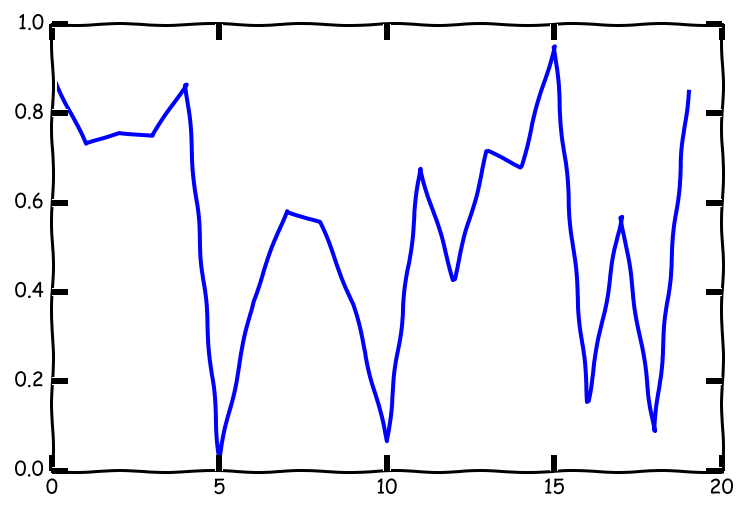

In [6]:
with plt.xkcd():
    plt.plot(np.random.rand(20))

Now, let's take a look at the same graph using our new xkcd custom style sheet. 

Before we can do so though, we'll need to restart the kernel and run our normal setup code again, to make sure that matplotlib has read in the new style sheet. I went ahead and copied the setup code in the cell below to make things a bit easier on us. So, let's go ahead and restart the kernel and re-import everything.

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

If everything worked, we should be able to print out the styles in the available styles list again and see our new xkcd style show up in the list.

In [8]:
for style in plt.style.available: print style

seaborn-darkgrid
seaborn-notebook
classic
seaborn-ticks
grayscale
bmh
seaborn-talk
dark_background
ggplot
fivethirtyeight
seaborn-colorblind
xkcd
seaborn-deep
seaborn-whitegrid
seaborn-bright
seaborn-poster
seaborn-muted
seaborn-paper
seaborn-white
seaborn-pastel
seaborn-dark
seaborn-dark-palette


And, there it is, so everything looks like it worked, but let's give it a try to see if it looks like the plot we created with the `xkcd` function.

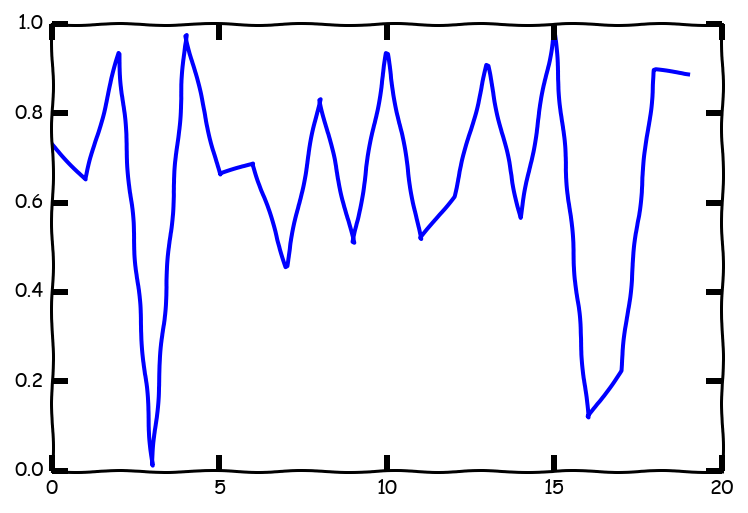

In [9]:
with plt.style.context('xkcd'):
    plt.plot(np.random.rand(20))

And, it looks pretty much exactly the same as the one we saw above, so it looks like our new style works just fine!

Before we move on though, I think we should give our new style sheet a proper test. The matplotlib documentation has some [sample code][1] that uses the `xkcd()` function, and I've conveniently copied it into the cell below, so we can give it a try using our new style sheet. Let's go ahead run the code now to make sure that everything looks just right.

[1]: http://matplotlib.org/xkcd/examples/showcase/xkcd.html

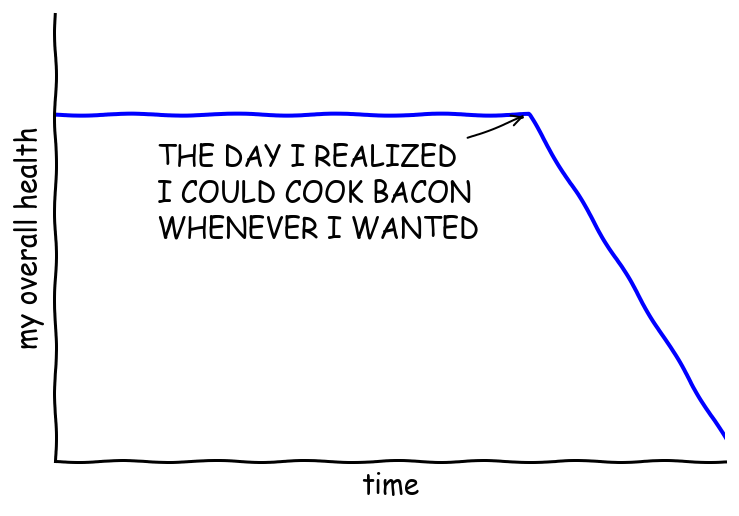

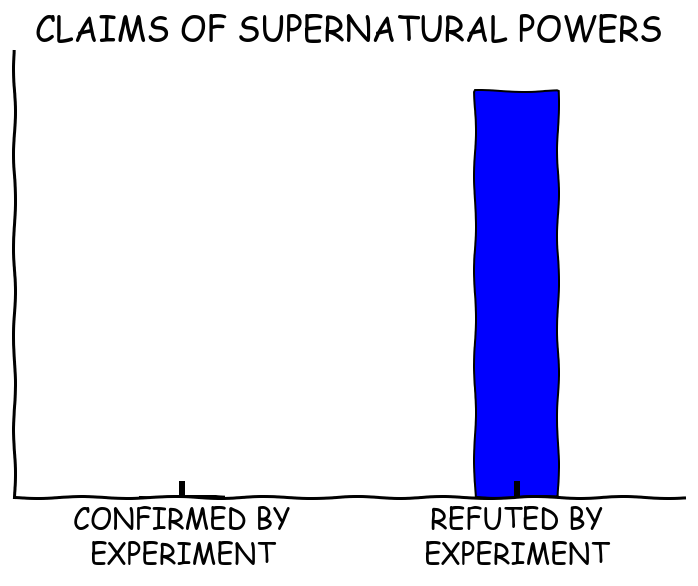

In [10]:
with plt.style.context('xkcd'):

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    plt.show()

## Conclusion

And, that will bring this lesson to a close.

As we've seen over the majority of this course, while matplotlib is a powerful visualization library, the default look of its plots won't be winning any awards anytime soon. But, luckily, you're not stuck with the default. As we've seen over the past three lessons, matplotlib is extremely configurable, and with just a little bit of work, we can make our plots look as good as any other visualization library out there, and with style sheets, we can save and reuse our custom styles, as well as share them with the rest of the world.